# Planetary Motion Project

## Authors: Ben Wills, Qinghong Shen, Tom Pagulatos and Yu Liang



## Simulating the motion of an Earth like planet around the sun.

We can use the fact that angular momentum is conserved in this problem to assure that the motion of our earth like planet is planar, meaning that we only need two co-ordinates to describe its loaction, another simplification we can make to the problem is making the sun the origin of our co-ordinate system. This means that we only need to consider the position of the earth relative to the sun rather than considering two position vectors at any one time step. This is allowed because the Earth like planets mass will be so much less than that of the sun that the centre of mass that they both orbit will be within the sun thus the sun will barely move, hence we can ignore its motion.

The gravitational force exerted on the earth by the sun is given by $F(\textbf{r})$, where $\textbf{r}$ is the position vector of the Earth like planet relative to the sun (the origin).

$$F(\textbf{r}) = \frac{-GM_{sun}M_{Earth}\textbf{r}}{{|\textbf{r}|}^3}$$

$$G = 6.674 \times 10^{-11} \frac{Nm^2}{{kg}^2} \\ M_{sun} = 1.989 \times 10^{30} \ kg \\ M_{earth} = 5.972 \times 10^{24} \ kg$$

Note that gravity is a central force meaning that it is always directed towards the origin and that energy is conserved under this force.

Newtons second law allows us to link this force to accelaration using $M_{earth}\ddot{\textbf{r}} = F(\textbf{r})$ so that we have:

$$\ddot{\textbf{r}} = \frac{-GM_{sun}\textbf{r}}{{|\textbf{r}|}^3}$$

We will introduce some notation for velocity, $\textbf{v}$, and accelaration, $\textbf{a}$, to make the equations easier to read.

$$\dot{\textbf{r}} = \textbf{v} \\ \textbf{a} = \frac{F(\textbf{r})}{M_{earth}}$$

We will have initial position and velocity values to initialise the algorithm, they are $\textbf{r}_{0}$ and $\textbf{v}_{0}$ respectively.
 
We will be using the Velocity Verlet algorithm to deduce the motion of the Earth-like planet, this is a good integrator since it will preserve the conservation of energy of the conservative system. The algorithim is implemented as follows, for a given time step $dt$:


$$\textbf{r}_{k+1} = \textbf{r}_k + \textbf{v}_k dt + \frac{1}{2} \textbf{a}_k dt^2$$
$$\textbf{a}_{k+1} = \frac{F(\textbf{r})}{M_{Earth}} $$
$$\textbf{v}_{k+1} = \textbf{v}_k + \frac{1}{2}(\textbf{a}_{k} + \textbf{a}_{k+1}) dt $$

We have included a plot of what this orbit looks like over a year.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from PIL import Image
from math import *

## Earths orbit around the sun

In [2]:
def orbital_vel_plot(v,years,steps, verbose = False):
    """
    Letting the sun be at the origin of our system allows us to greatly simplify our problem, 
    so then we can only consider one position vector instead of 2. Furthermore this function will plot an orbit
    which depends on initial velocity v, and number of years n if verbose = False, if verbose = True: position,
    velocity, accelaration and time step are returned.
    """
    def acceleration(r): # acceleration at vector r
        G = 6.67430e-11
        m_sun = 1.989e30
        return -G * m_sun * (r/(np.dot(r,r)**1.5))

    n = 365*steps*years
    
    r_0 = [149.59787e9,0]
    a_0 = acceleration(r_0)
    v_0 = [0, v]

    # where n is the number of years on plot

    r = np.array([[0.,0.]]*(int(n +1)))
    v = np.array([[0.,0.]]*(int(n +1)))
    a = np.array([[0.,0.]]*(int(n +1)))

    r[0] = r_0
    a[0] = a_0
    v[0] = v_0

    time = 60*60*24*365*years     # seconds in a year
    dt = time/(n)          # increments of one day/steps in seconds.

    # Implementing the velocity Verlet integrator.
    
    for k in range(int(n)):

        r[k+1] = r[k] + v[k] * dt + 0.5 * a[k] * dt**2

        a[k+1] = acceleration(r[k+1])

        v[k+1] =  v[k] + 0.5 * (a[k] + a[k+1]) * dt

    if verbose == False:
        # Find maximum and minimum x and y values, to 2 sf.

        x_vals = []
        y_vals = []
        for i in range(len(r)):
            x_vals.append(r[i][0])
            y_vals.append(r[i][1])
            
        # Plot orbit

        fig = plt.figure(dpi=150)
        ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
        ax.set_aspect('equal', adjustable='datalim')
        ax.patch.set_facecolor((0,0,0,0.9))
        plt.plot(r[:,0],r[:,1], markersize = 1, marker ='.', color = 'c', label = 'Earth')
        plt.plot(0,0,'o', markersize=8 ,label = 'The Sun', color = 'orange')
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        
        
        
        # Calculating eccentricity (specifically an ellipse).
        
        
        
        v_conditional = np.dot(v_0,v_0)**.5
        
        if v_conditional < 1.3*29800:
            semi_major_axis = abs(max(x_vals) - min(x_vals))/2
            semi_minor_axis = abs(max(y_vals) * 2)/2
            a = sqrt(1 - semi_minor_axis**2 / semi_major_axis**2 )
            print('Eccetricity:', a)
        
        # Plotting the Aphelion and Perihelion.
        
        radius = []
        for i in range(len(r)):
            radius.append(np.dot(r[i],r[i])**0.5)
        r_min = r[radius.index(min(radius))]
        r_max = r[radius.index(max(radius))]
        plt.plot(r_min[0],r_min[1],'o', markersize=4 , color = 'm', label = 'Perihelion')
        plt.plot(r_max[0],r_max[1],'o', markersize=4 , color = 'g', label = 'Aphelion')
        
        
        # Plotting the position of the sun. 
        
        
        plt.title('Earth orbiting the Sun', fontsize=10)
        plt.xlabel('Meters', fontsize=10)
        plt.ylabel('Meters', fontsize=10)

        plt.legend(loc='center left', prop={'size':10},bbox_to_anchor = (1,0.5))
        plt.show()
        
        
            
    if verbose == True:
        return r,v,a

Eccetricity: 0.0007752235636360677


<Figure size 1080x1080 with 0 Axes>

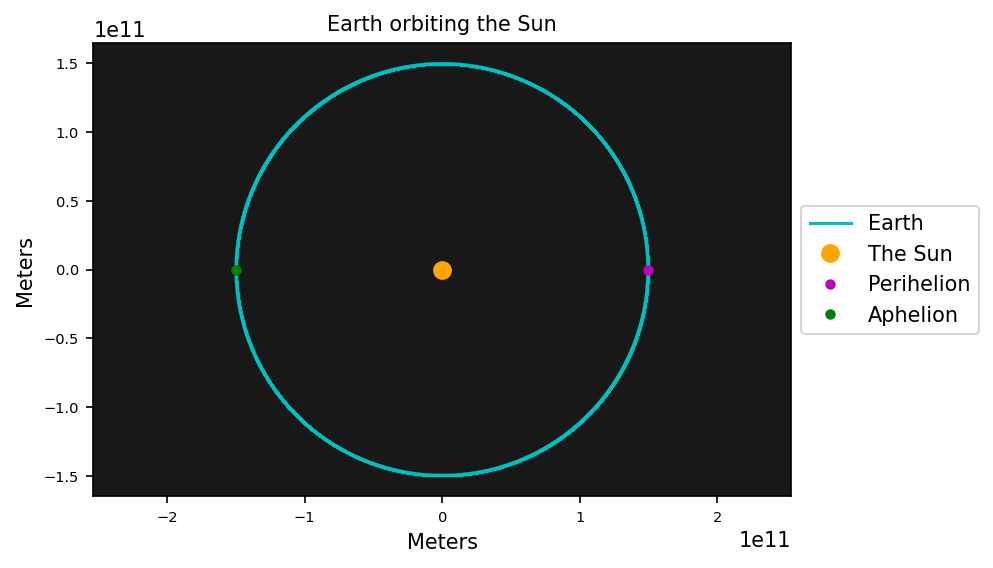

In [3]:
plt.figure(figsize= (15,15))
orbital_vel_plot(29.8e3,1,24)

## Energy conservation within the orbit.

The Velocity Verlet algorithm conserves energy, which means that the total energy of the system remains constant in time. The expression for the total energy $E$ is as follows:
$$E = \frac{1}{2}M_{Earth} |\dot{\textbf{r}}|^2 - \frac{GM_{sun}M_{earth}}{|\textbf{r}|}$$



In [ ]:
years = 1
n = 24

T, U, E, error, radius, vel = [],[],[],[],[],[] # Here we initialise our lists to be filled, these are: Kinetic
                                                # Energy, Potential Energy,Total energy, Error between initial 
                                                # energy and energy at each step, Radius and velocity.
                                               
m_sun = 1.989e30
m_earth = 5.972e24
G = 6.67430e-11

# Generating position, velocity and acceleration arrays.
r,v,a = orbital_vel_plot(29.8e3,1,24,True)

# Here we calculate the arrays for kinetic, potential and total enrgy for each time step, further we calculate
# an array of percentage error from the initial total energy.        
for i in range(int(len(r))): 
    T.append(0.5 * m_earth * np.dot(v[i],v[i]))
    U.append((-G * m_sun * m_earth)/np.dot(r[i],r[i])**0.5)
    E.append(T[i] + U[i])
    error.append(((E[0]-E[i])/E[0]) * 100)
    

# Now we are eqipped to compose our energy argument.
Energy_scaled = plt.figure(figsize = (15,10))
plt.plot(E)
plt.title('Total Energy with scaled axes.')
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Total energy', fontsize = 15)
plt.show()


 Note how this curve is actually showing a fuctuation of order $10^{24}$ (which is $10^9$ times smaller than our energy) due to the rescaling done automatically by the Matplotlib library.
 We can see how energy is conserved by renormalising the axes like so.



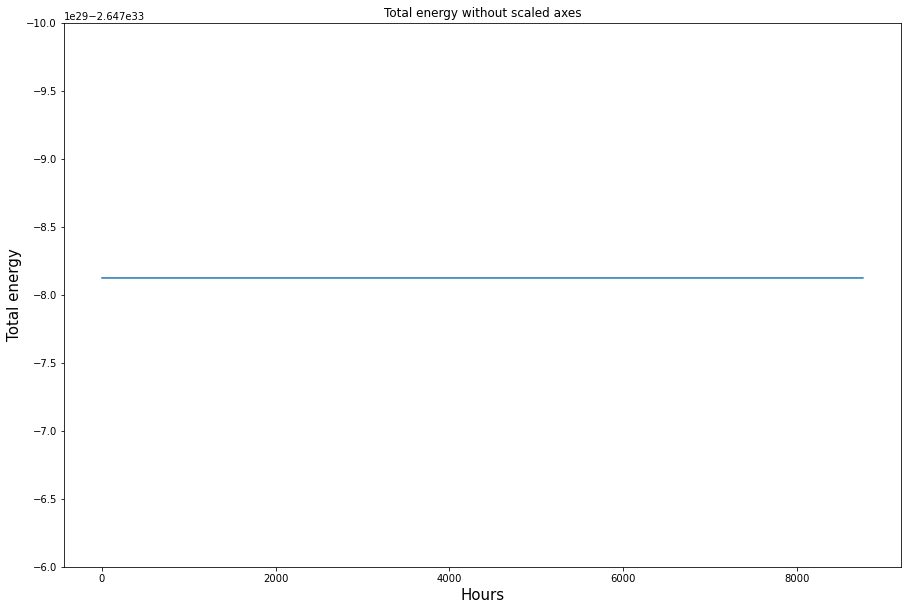

In [45]:
Energy_true = plt.figure(figsize = (15,10))
plt.ylim([-2.6476e33, -2.6480e33]) # Rescaling the axes to default.
plt.plot(E)
plt.title('Total energy without scaled axes')
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Total energy', fontsize = 15)
plt.show()

Here we can see very clearly that energy is conserved, if there is any doubt left we have the following figure.

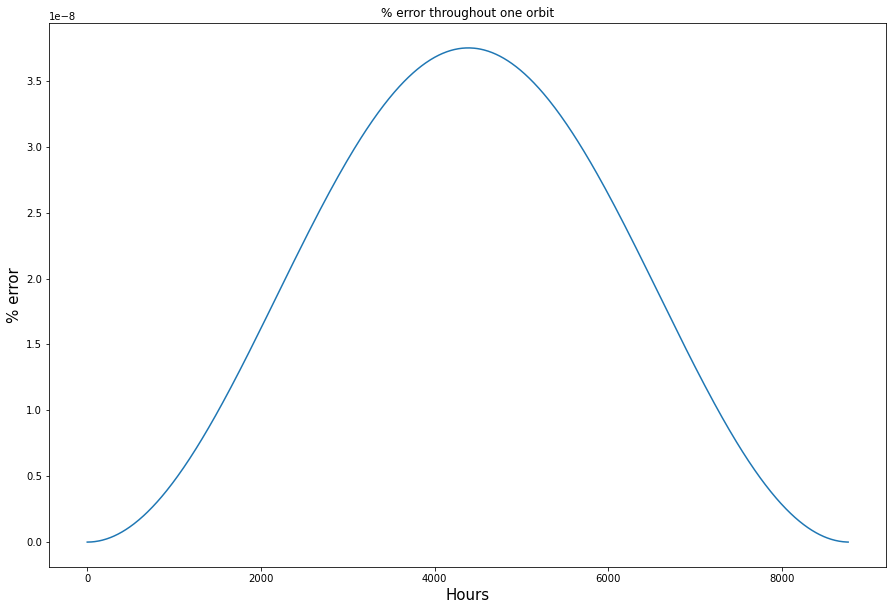

In [46]:
Error_plot = plt.figure(figsize = (15,10))
plt.plot(error)
plt.title('% error throughout one orbit', fontsize=12)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('% error', fontsize = 15)
plt.show()

 Here we can clearly see that the largest percentage difference from the initial energy is a $\frac{3.5}{100000000}$th
 of a percent, which is effectively negligible. Thus we can reasonably conclude considering the evidence that
 Energy is infact conserved.

## How intial velocity is related to the stability of the orbit

We are asked to analytically show that this value of $v_{0}$ is the only velocity compatible with a near circular orbit. To show this we will derive the analyitical expression for the path of the planet around the sun.

We know that since gravity is a central force, that the total energy of the system is unchanging in time, and thus that is where we shall begin our derivation in polar co-ordinates. Where $r$ is the distance from the origin and $\theta$ is the angle taken from the positive x-axis.
$$E = \frac{1}{2}M_{Earth}(\dot{r}^2 + r^2\dot{\theta}^2)  - \frac{GM_{sun}M_{earth}}{r}$$

We can solve this differential equation for r. The following equation is the trajectory of earth for a given energy E.

$$r(\theta) = \frac{v_{0}^2r_{0}^2}{GM_{sun}} \frac{1}{1+ \sqrt{1+ \frac{2Ev_{0}^2r_{0}^2}{m_{earth}G^2m_{sun}^2}}\cos(\theta)}$$

Where $r_{0},v_{0},G,m_{earth},m_{sun}, \theta, r$ are the initial orbital radius, initial tangiental velocity of earth, Newtons gravitational constant, the mass of the earth, the mass of the sun, the angle measured anticlockwise from the positive x axis, the distance of the earth from the sun respectfully.

This is simply the general equation for conic sections in polar co-ordinates, hence we can show that if the coefficient of $\cos(\theta)$ is zero that the following equation is true for $v_0$.

$$ \sqrt{-\frac{G^2m_{sun}^2m_{earth}}{2Er_{0}^2}} = v_{0}$$

Hence $v_{0} = 29800.007965902656$ is the only initial velocity that will result in a (theoretically) perfect circular orbit, as if it differs the value of the coefficient will no longer be zero and the orbit will no longer be circular.

In [47]:
v0 = (- G ** 2 * m_sun**2 * m_earth / (2*E[0]*r[0][0]**2) )**0.5
v0

29800.007965902656

## Criterion for eliptic and hyperbolic trajectories

If the total energy, $E$ of our planet is positive the orbit will be hyperbolic, if $E$ is negative then the orbit will be eliptic. Since we have the eccentricity $e = \sqrt{1+ \frac{2Ev_{0}^2r_{0}^2}{m_{earth}G^2m_{sun}^2}}$, if $e > 1$ then total energy E must be positive and thus the orbit is hyperbolic, if $e<1$ the total energy must be negative and thus the orbit is eliptic.


## Eliptical, hyperbolic and circular orbits

Here we have implemented an interactive plotter that will illustrate how orbits are effected by varying the initial velocity of the planet.

Note: All velocities are multples of $29800 \frac{m}{s}$.

In [3]:
def update_plot(v0,years):
    orbital_vel_plot(v0*29800,years,24)
   
v0 = widgets.FloatSlider(value = 1, description = 'Initial velcocity for orbit 1:',min = 0, max = 3, step = 0.1, disabled=False, style = {'description_width': 'initial'} )
years = widgets.FloatText(value = 1, description = 'Years to be plotted:', disabled=False,style = {'description_width': 'initial'})


widgets.interactive(update_plot, v0 = v0, years = years)

interactive(children=(FloatSlider(value=1.0, description='Initial velcocity for orbit 1:', max=3.0, style=Slid…

Furthermore, we have included 4 animations of the 5 different types of orbit in our study. The fifth occurs when initial velocity is more than $29800$ and less than escape velocity, in this case the period is longer than 1 earth year, but is eliptical.

<h3 align="center"> Eliptical Orbit </h3> 
<img src="eliptic_faster.gif" width="650" align="center">


The first is an eliptical orbit, which occurs when the intial velocity is less than $29800$ meters per second.

 <h3 align="center">Circular Orbit</h3> 
<img src="CIRCULARORBITFINAL.gif" width="650" align="center">

The second is a circular orbit which occurs when the initial velocity is exactly $29800$.

 <h3 align="center">Parabolic Orbit </h3> 
<img src="PArabola_faster_1.gif" width="650" align="center">

The third is a parabolic orbit, which occurs when our initial velocity is exactly the escape velocity of our system, this orbit is not periodic!

 <h3 align="center">Hyperbolic Orbit </h3>
<img src="hyperbolas_faster_1.gif" width="650" align="center">


Lastly we have a hyperbolic orbit which occurs when our initial velocity is larger than the escape velocity of our system, this orbit is also not periodic. Both parabolic and hyperbolic orbits fling the earth into space, in this case the gravitational force is too weak to make the total energy of the system negative.

## The escape speed of an earth-like planet from the sun’s gravitational well

The escape speed is the minimum speed needed for a free object to escape from the gravititional influence of a massive body. It depends on the mass of the centre body$(M)$ and the distance$(r)$ between centre of the massive body and centre of the object. More generally we know that when excentricity is greater than or equal to one, the shape of the orbit will be a parabola or a hyperbola, above we have proven that for this to happen we must have that total energy is positive, thus the escape velocity is the boundary on which that happens i.e when total energy equals $0$.
$$E_k+E_p=0$$
We have that
$$E_K=\frac{1}{2}mv_e^2$$
and
$$E_p=-\frac{GMm}{r}$$
Thus the escape speed $v_e$ is equal to:
$$\frac{1}{2}mv_e^2-\frac{GMm}{r}=0$$
$$v_e=\sqrt{\frac{2GM}{r}}$$

In [37]:
def escape_speed(r):
    G = 6.67430e-11
    m_sun = 1.989e30
    v=np.sqrt(2*G*m_sun/r)
    return v

v_e = escape_speed(149.59787e9)
v_e

42128.16533802769

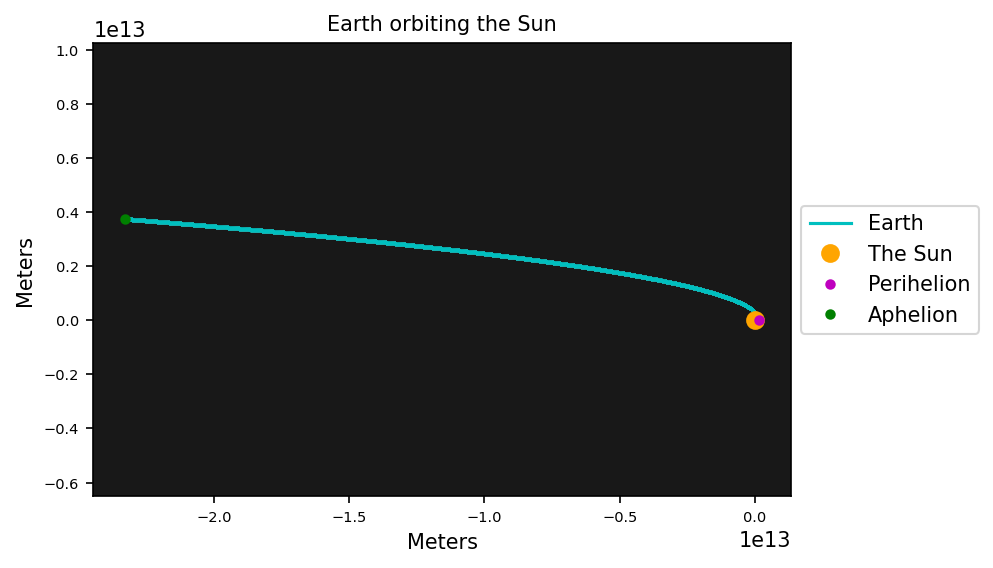

In [38]:
orbital_vel_plot(v_e,150) # Here we can see that the orbit is hyperbolic and thus the earth like planet has escaped
                        # the gravitational pull of the sun.

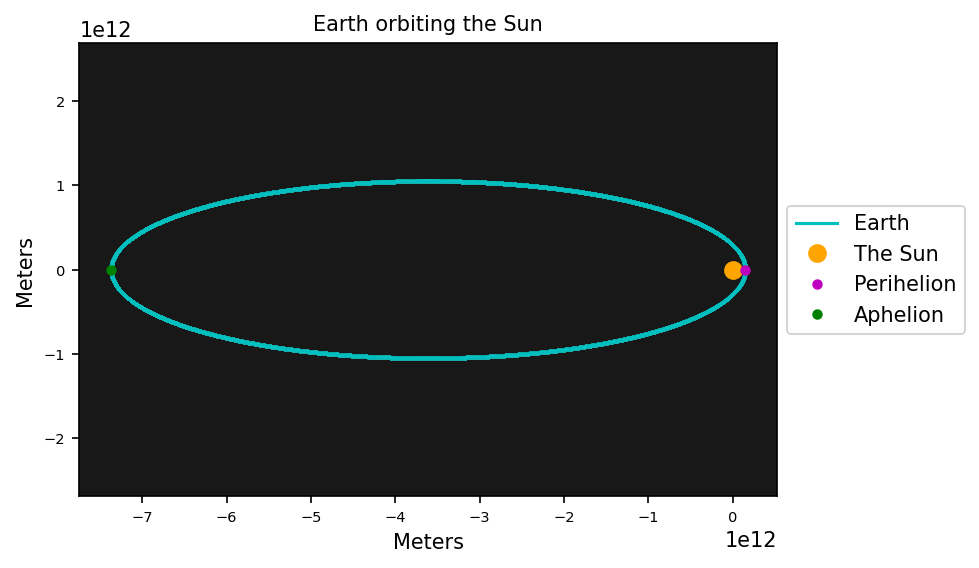

In [39]:
orbital_vel_plot(v_e*.99,150) # Here we can see that even 99% of the escape velocity does not mean that the earth
                              # will escape, hence this boundry is the escape velocity.

## Analyitic proof of keplers second law.

Keplers second law states that "A line joining a planet and the sun sweeps out equal areas in equal time intervals", in more mathematical language we have that $\frac{dA}{dt} = constant$ i.e no matter the position a planet is at the rate of change of area is always the same.

NOTE: We are considering eliptic trajectories hence $e < 1$ and $E < 0$.

Earlier in the document we derived a formula for the orbit of a planet around a much more massive sun, just like the earth and the sun. 

$$r(\theta) = \frac{v_{0}^2r_{0}^2}{GM_{sun}} \frac{1}{1+ \sqrt{1+ \frac{2Ev_{0}^2r_{0}^2}{m_{earth}G^2m_{sun}^2}}\cos(\theta)}$$

for conviniences sake let us define $\alpha, e$ where $\alpha$ is a constant and $e$ is eccentricity of the orbit which is also constant. Now our equation of motion reduces to the following.

$$r(\theta) = \frac{\alpha}{1+e\cos(\theta)}$$
where $ \alpha = \frac{v_{0}^2r_{0}^2}{GM_{sun}} $ and $ e = \sqrt{1+ \frac{2Ev_{0}^2r_{0}^2}{m_{earth}G^2m_{sun}^2}}$.

Say we define a function of $\theta$, the angle measured anti-clockwise from the positive x axis, that measures the area sweeped out in the angular interval $(0,\theta)$, we'll define it as $A(\theta)$. We can find an expression for $A(\theta)$ by considering a double integral over the region in question, i.e our ellipse, E.

$$A(\theta) = \iint_E r dr\,d\theta \\
= \int_{0}^{\theta} \int_{0}^{\frac{\alpha}{1+e\cos(\theta)}}r dr\,d\theta' \\ 
= \frac{1}{2} \int_{0}^{\theta} \frac{\alpha^2}{(1+e \cos(\theta'))^2} d\theta'$$

Now by the chain rule we have that:

$$\frac{dA}{dt} = \frac{dA}{d\theta} \frac{d\theta}{dt}$$

By the Fundamental Theorem of Calculus we have that we can write this exactly.

$$\frac{dA}{dt} = \frac{r^2}{2} \frac{d\theta}{dt}$$

Using the fact that angular momentum is conserved in our system and therefore is a constant, l, defined as $l = m_{earth}r^2 \frac{d\theta}{dt}$ thus we can conclude that $\frac{dA}{dt}$ is constant, to be more exact we have the following.

$$\frac{dA}{dt} = \frac{l}{2m_{earth}}$$

Hence keplers second law is true.

  ## Numerical proof.
  
In this proof we will show that $\frac{dA}{dt}$ is constant numerically, to be specific we will show that if we plot $A$ against time step the result will be a straight line.

In [7]:
# So long that initial velocity is less than the escape velocity (and not 29800) we can plot an eliptical orbit.
v_0 = 29.8e3
r,v,a= orbital_vel_plot(v_0,15,100,True) # Position,velocity,accelaration.

G = 6.67430e-11
m_sun = 1.989e30
m_earth = 5.972e24

Areas = [] 
area = 0
# Here we find the area swept out in each time step of the orbit
for j in range(len(r)-1):
    # The method is finding the area of a triangles formed between two vectors r[i] and r[i+1] and the curve,
    # since the time step is so small this approximation is valid in finding the area.
    area += (0.5)*((np.dot(r[j],r[j])**.5)*(abs(np.dot(r[j],r[j])-np.dot(r[j+1],r[j+1])))**.5)
    Areas.append(area)
                 





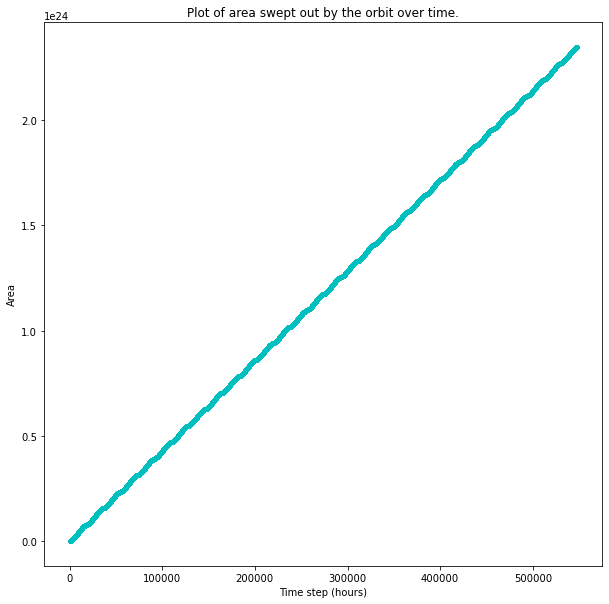

In [8]:
plt.figure(figsize = (10,10))

plt.plot(Areas,'.',color = 'c')
plt.title('Plot of area swept out by the orbit over time.')
plt.xlabel('Time step (hours)')
plt.ylabel('Area')
plt.show()



Here we can see that this line is relatively linear, but not wholly linear. This is because our orbit is not a perfefct elipse and thus the areas fluctuate slightly.

# The gravitational effect of a Jupiter sized planet on the sun.

We are asked to calculate the trajectory of a large Jupiter sized planet around the sun, which is shown below. We can see that at 1 AU the orbit is stable and almost circular. Note that this graph is drawn with the sun at the centre as the reference point, i.e it seems stationary in relation to jupiter.

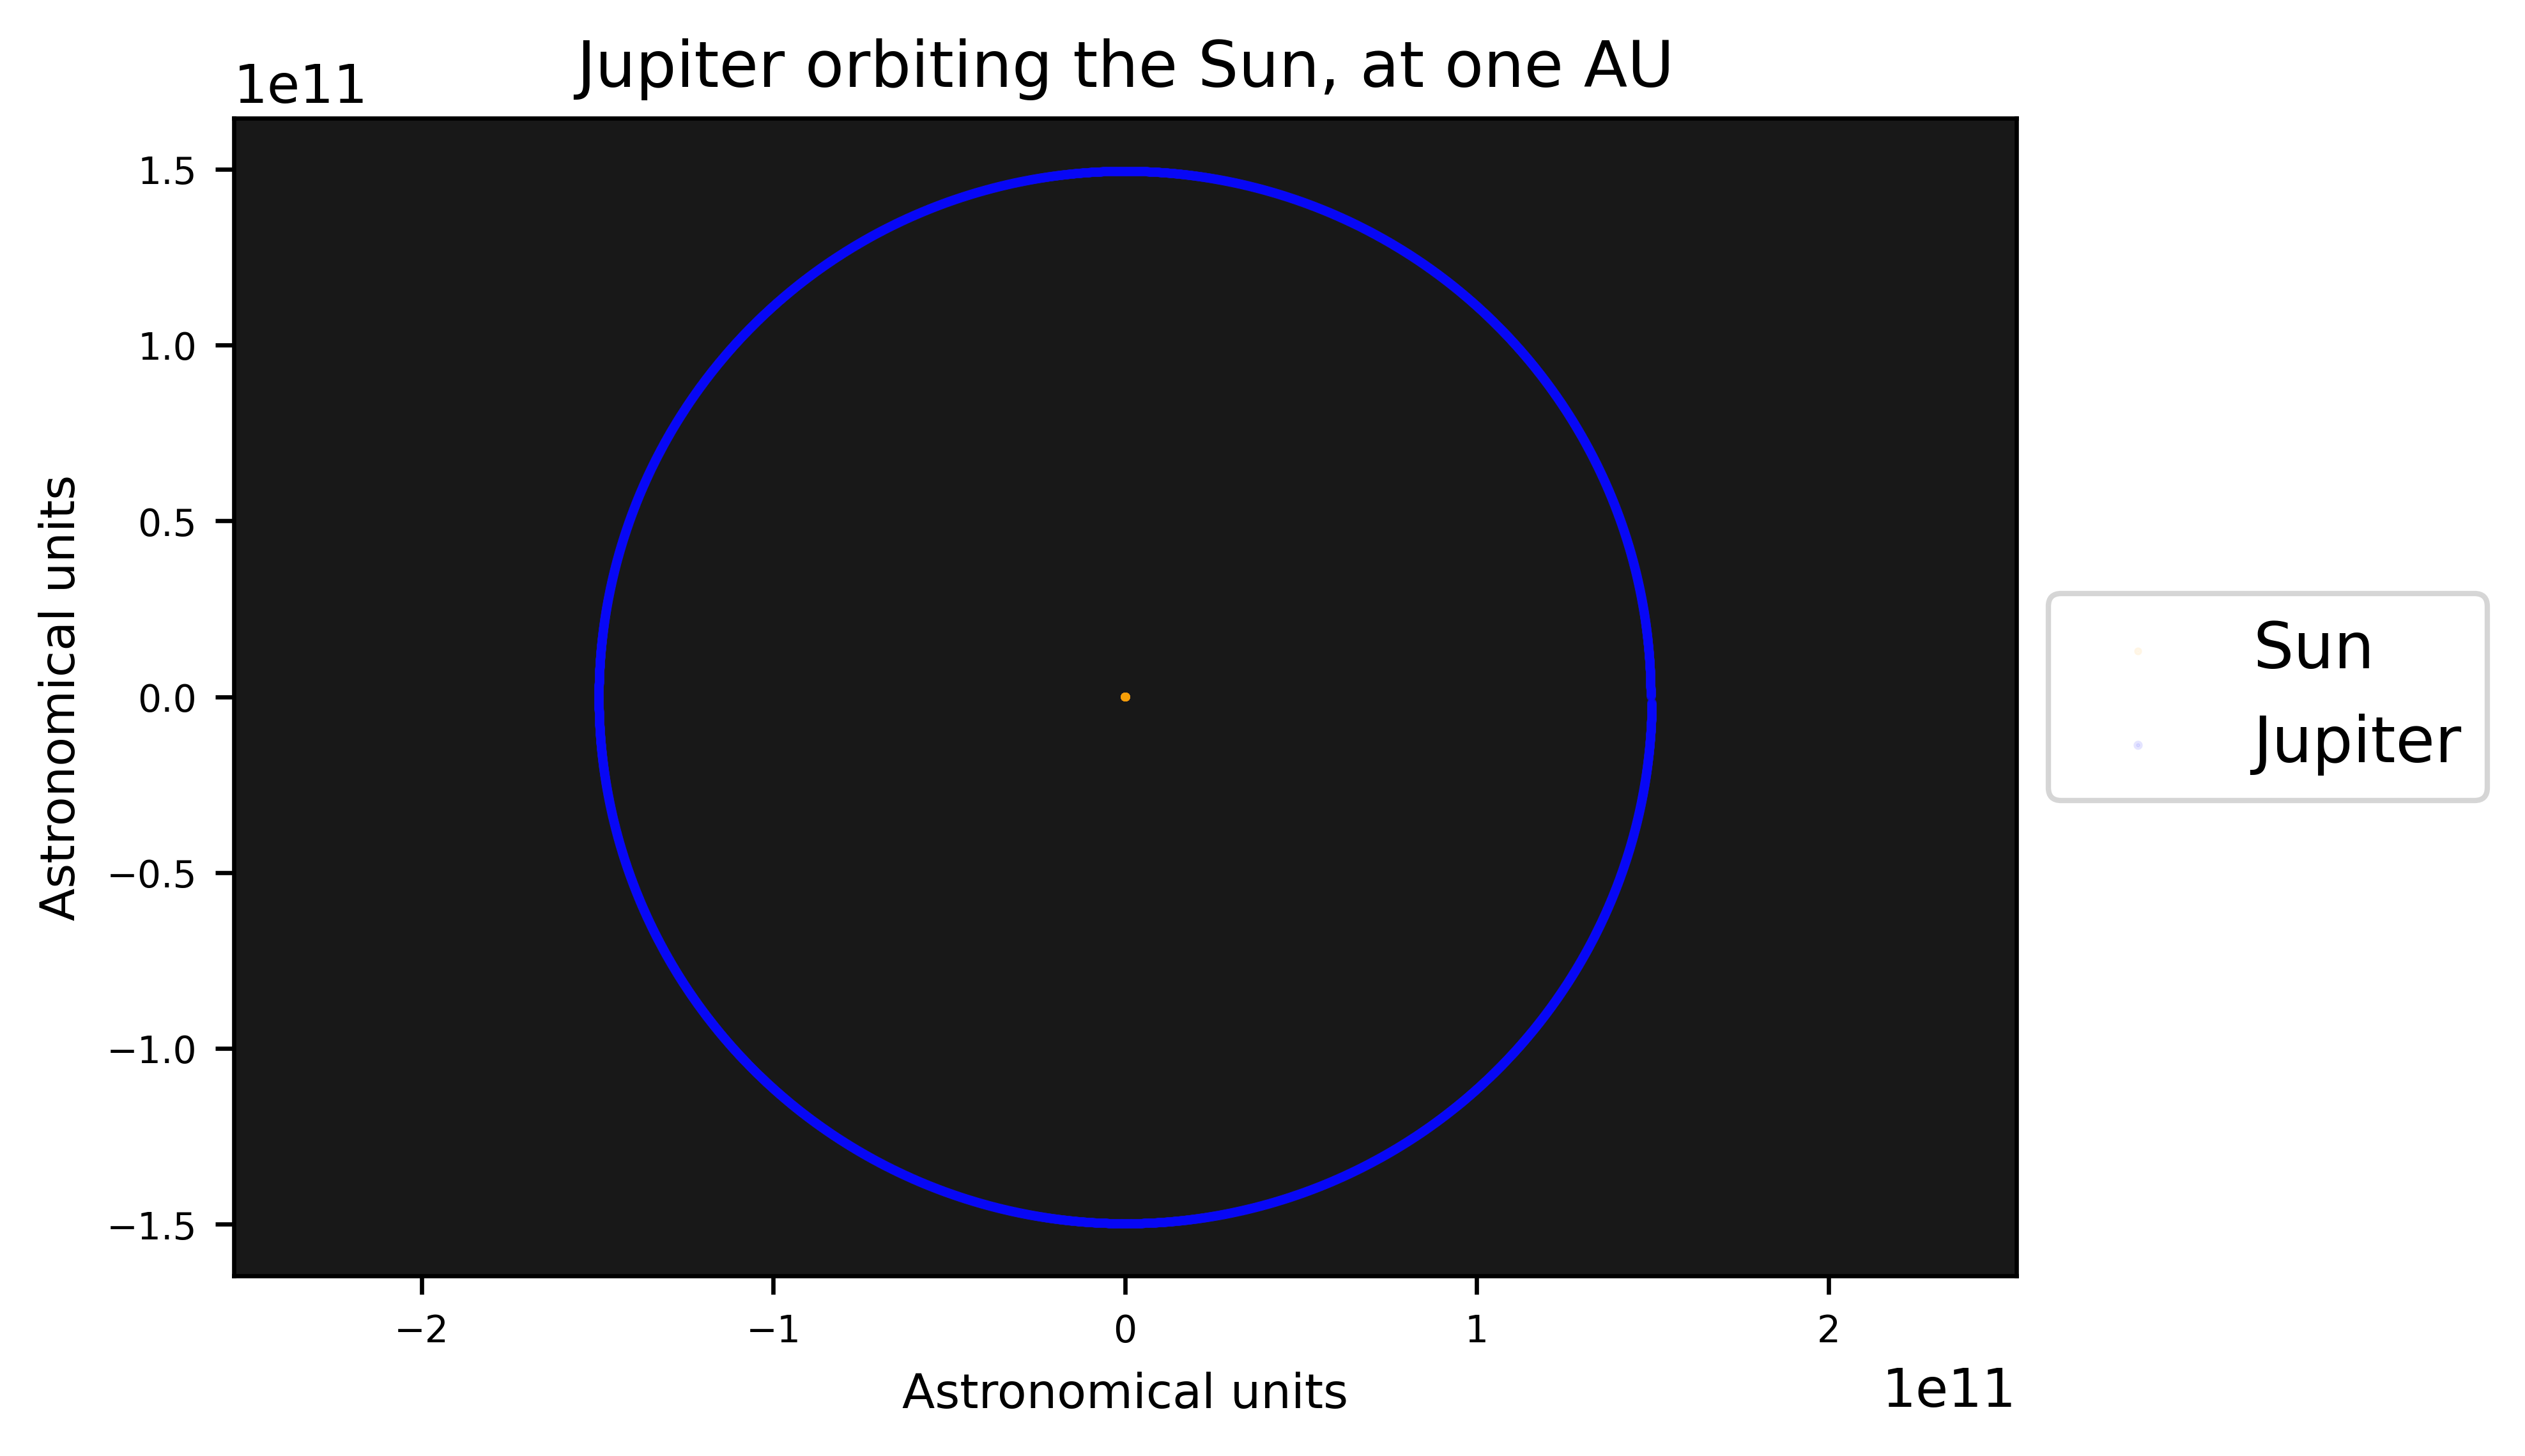

In [4]:
def acceleration_2_bodies(m_2, r_1, r_2):
    """
    Acceleration on m_1 by m_2.
    """
    G = 6.67430e-11
    
    return G * m_2 * (r_2 - r_1) / np.dot(r_2 - r_1, r_2 - r_1)**1.5

m_sun = 1.9885e30
m_jupiter = 1.89819e27

# A year at one AU from the sun.
days = 365.07441253571255

years = 1
step = 100
        
# years is number of years on plot
# position, velocity, and acceleration of each body
N = int(days*years*step + 1)

# Initialising position, velocity and accelaration arrays.
r_sun = np.zeros((N,2))
r_jupiter = np.zeros((N,2))
v_sun = np.zeros((N,2))
v_jupiter = np.zeros((N,2))
a_sun = np.zeros((N,2))
a_jupiter = np.zeros((N,2))

r_sun[0] = [-142667523.65530437,0]
r_jupiter[0] = [149.59787e9-142667523.65530437,0]  # initial position of jupiter

v_sun[0] = [0,-28.419069486831177]
v_jupiter[0] = [0,29771.16077661551]

a_sun[0] = acceleration_2_bodies(m_jupiter, r_sun[0], r_jupiter[0])
a_jupiter[0] = acceleration_2_bodies(m_sun, r_jupiter[0], r_sun[0])

# Time steps.

time = 31542429.243085567*years       # seconds in a year
dt = time/(days*years*step)      # increments of one day


# Implementing velocity verlet.

for k in range(N-1):
    r_sun[k+1]     = r_sun[k] + v_sun[k] * dt + 0.5 * a_sun[k] * dt**2
    r_jupiter[k+1] = r_jupiter[k] + v_jupiter[k] * dt + 0.5 * a_jupiter[k] * dt**2
    a_sun[k+1]     = acceleration_2_bodies(m_jupiter, r_sun[k], r_jupiter[k])
    a_jupiter[k+1] = acceleration_2_bodies(m_sun, r_jupiter[k], r_sun[k])
    v_sun[k+1]     = v_sun[k] + 0.5 * (a_sun[k] + a_sun[k+1]) * dt
    v_jupiter[k+1] = v_jupiter[k] + 0.5 * (a_jupiter[k] + a_jupiter[k+1]) * dt

# Plotting the orbit of jupiter around the sun.

fig = plt.figure(dpi=600)
ax = fig.add_subplot(1, 1, 1, facecolor=(0,0,0,0.9)) # nrows, ncols, index
ax.set_aspect('equal', adjustable='datalim')

plt.scatter(r_sun[:,0], r_sun[:,1], s = 0.2, color = 'orange', label = 'Sun', alpha=0.1, edgecolors=None)
plt.scatter(r_jupiter[:,0], r_jupiter[:,1], s = 0.5, color = 'b', label = 'Jupiter', alpha=0.1, edgecolors=None)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('Jupiter orbiting the Sun, at one AU', fontsize=12)
plt.xlabel('Astronomical units', fontsize=9)
plt.ylabel('Astronomical units', fontsize=9)
plt.legend(loc='center left', prop={'size':12},bbox_to_anchor = (1,0.5))
plt.show()

## The wobble of the sun.

Jupiter is so masssive that the barycentre (centre of mass) of the system is not at the centre of the sun, infact it is within the sun causing a noticable 'wobble' which means that the sun rotates around this point. We can see this in the plot below - Note that the cyan line is the centre of mass of the sun and the radius of this orbit is less than that of the sun, thus the sun is orbiting a point within its-self.

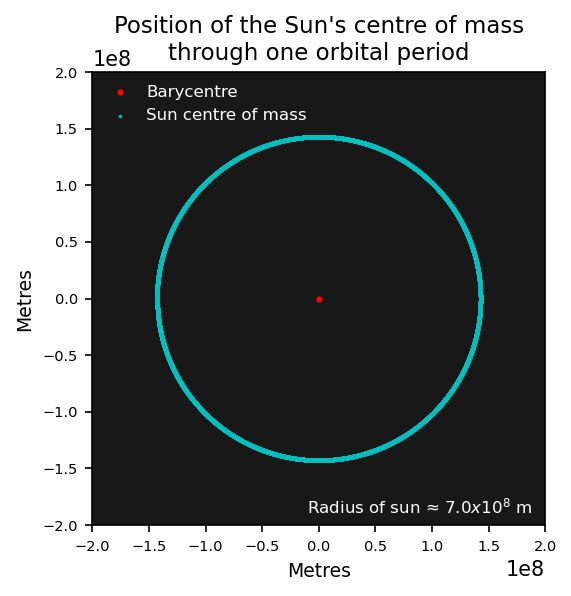

In [5]:
# Plotting the orbit of the centre of mass off the sun around the barycentre.

fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1, facecolor=(0,0,0,0.9)) # nrows, ncols, index
ax.set_aspect('equal', adjustable='box')

plt.scatter(r_sun[:,0], r_sun[:,1], s = 0.5, color = 'c', label = 'Sun centre of mass', alpha=1, edgecolors=None)
plt.plot(0,0,'o', markersize=2 , color = 'red', label = 'Barycentre')
plt.text(-0.1e8, -1.9e8, 'Radius of sun ≈ $7.0x10^{8}$ m', color = 'w', fontsize = 8)

plt.xticks(np.arange(-2e8,2.1e8,0.5e8), fontsize=7)
plt.yticks(np.arange(-2e8,2.1e8,0.5e8), fontsize=7)

plt.title("Position of the Sun's centre of mass\n" + r'through one orbital period', fontsize=11)
plt.xlabel('Metres', fontsize=9)
plt.ylabel('Metres', fontsize=9)
legend = plt.legend(loc='upper left', prop={'size':7}, frameon=False)
legend.get_frame().set_alpha(None)             # transparent legend
legend.get_frame().set_facecolor((0, 0, 0, 0)) # transparent legend
plt.setp(legend.get_texts(), color='w', fontsize = 8) # text colour white
plt.show()

 Below we see a further illustration of how the sun 'wobbles', each greyed out circle is the sun at a different time step in it's orbit. The blue dots are the centre of mass of the sun, and the red dot is the barycentre of the system, so we can clearly see that the centre of mass of the sun (and therefore the sun) orbit the barycentre - which is clearly within the sun - causing a wobbling effect.

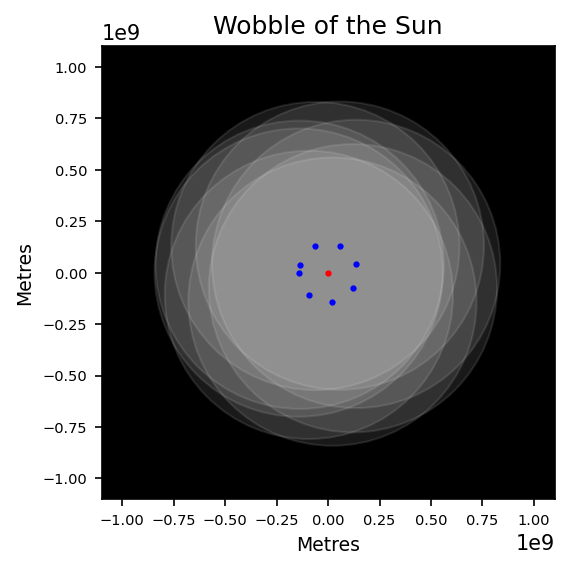

In [7]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_xlim(xmin = -1.1e9, xmax = 1.1e9)
ax.set_ylim(ymin = -1.1e9, ymax = 1.1e9)
ax.patch.set_facecolor('black')
ax.set_aspect('equal', adjustable='box')


small = r_sun[0::5000]

# Plotting the wobble of the sun, i.e a circle with the radius of the sun, centered at where the centre of mass
# is at the time step.

plt.plot(0,0,'o', markersize=2 , color = 'red', label = 'Barycentre')
circle1 = plt.Circle((small[0,0], small[0,1]), 7e8, color = 'white', alpha=0.1)
circle2 = plt.Circle((small[1,0], small[1,1]), 7e8, color = 'white', alpha=0.1)
circle3 = plt.Circle((small[2,0], small[2,1]), 7e8, color = 'white', alpha=0.1)
circle4 = plt.Circle((small[3,0], small[3,1]), 7e8, color = 'white', alpha=0.1)
circle5 = plt.Circle((small[4,0], small[4,1]), 7e8, color = 'white', alpha=0.1)
circle6 = plt.Circle((small[5,0], small[5,1]), 7e8, color = 'white', alpha=0.1)
circle7 = plt.Circle((small[6,0], small[6,1]), 7e8, color = 'white', alpha=0.1)
circle8 = plt.Circle((small[7,0], small[7,1]), 7e8, color = 'white', alpha=0.1)

# plotting the centres of mass.
for i in range(8):
    plt.plot(small[i,0], small[i,1], 'o', markersize=2 , color = 'b', label = 'Centre of mass')

# Adding the circles to the plot.
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)

plt.xticks(np.arange(-1e9,1.1e9,0.25e9), fontsize=7)
plt.yticks(np.arange(-1e9,1.1e9,0.25e9), fontsize=7)

plt.title('Wobble of the Sun', fontsize=12)
plt.xlabel('Metres', fontsize=9)
plt.ylabel('Metres', fontsize=9)
plt.show()

Below we see how the suns orbit changes as time continues, it appears to tilt by some angle as time goes on.

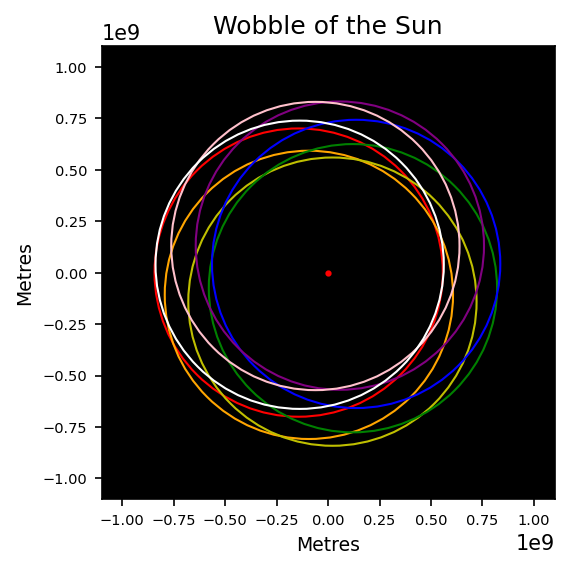

In [9]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_xlim(xmin = -1.1e9, xmax = 1.1e9)
ax.set_ylim(ymin = -1.1e9, ymax = 1.1e9)
ax.patch.set_facecolor('black')
ax.set_aspect('equal', adjustable='box')

small = r_sun[0::5000]

# Creating the circle plots once more, this time the circles aren't filled in, hence fill = 0.

circle1 = plt.Circle((small[0,0], small[0,1]), 7e8, color = 'red', fill=0)
circle2 = plt.Circle((small[1,0], small[1,1]), 7e8, color = 'orange', fill=0)
circle3 = plt.Circle((small[2,0], small[2,1]), 7e8, color = 'y', fill=0)
circle4 = plt.Circle((small[3,0], small[3,1]), 7e8, color = 'g', fill=0)
circle5 = plt.Circle((small[4,0], small[4,1]), 7e8, color = 'b', fill=0)
circle6 = plt.Circle((small[5,0], small[5,1]), 7e8, color = 'purple', fill=0)
circle7 = plt.Circle((small[6,0], small[6,1]), 7e8, color = 'pink', fill=0)
circle8 = plt.Circle((small[7,0], small[7,1]), 7e8, color = 'white', fill=0)
plt.plot(0,0,'o', markersize=2 , color = 'red', label = 'Centre of mass')

# Adding in the circles to our axes.

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)

plt.xticks(np.arange(-1e9,1.1e9,0.25e9), fontsize=7)
plt.yticks(np.arange(-1e9,1.1e9,0.25e9), fontsize=7)

plt.title('Wobble of the Sun', fontsize=12)
plt.xlabel('Metres', fontsize=9)
plt.ylabel('Metres', fontsize=9)
plt.show()

# The three-body problem.

Below we have plotted an instance of the famous three body problem. The problem is so famous due to its very chaotic nature, i.e small changes to inital conditions can cause the system to become chaotic. Below we can see an example of a chaotic system with 3 bodies of similar masses.

In [12]:
M11 = np.array([1.8e30, 2e30, 2.3e30])

POS11 = np.array([[-1.5e12,0,0],
                  [1.5e12,0,0],
                  [0,0,0]])

VEL11 = np.array([[1e3,1e3,0],
                  [1e3,2e3,0],
                  [-2e3,-2e3,0]])


def two(M, POS, VEL, years, step):
    def a(M,R):
        """
        Computes acceleration on each body for n bodies orbiting the sun. M is array of masses of bodies
        and R is array of position vectors relative to the sun.
        """
        G = 6.67430e-11
        A = np.zeros((len(M),3))
        for i in range(len(M)):
            acceleration = 0
            for j in range(len(M)):
                if j != i:
                    r = R[j]-R[i]
                    acceleration +=  G * M[i] * r / (r[0]**2 + r[1]**2 + r[2]**2)**1.5
            A[i] = acceleration
        return A


    n = 365*years
    
    #Initialising our arrays.
    
    POS = np.array([[[0]*3]*3]*int(n*step), dtype = float)
    POS[0] = POS11


    VEL = np.array([[[0]*3]*3]*int(n*step), dtype = float)
    VEL[0] = VEL11


    ACC = np.array([[[0]*3]*3]*int(n*step), dtype = float)
    ACC[0] = a(M,POS[0])

    seconds = 60*60*24*n               # seconds in run
    dt = seconds/(365*years*step)      # increments of one day

    # Implementing velocity verlet.    
        
    for k in range(int(365*years*step-1)):
        POS[k+1] = POS[k] + VEL[k] * dt + 0.5 * ACC[k] * dt**2

        ACC[k+1] = a(M, POS[k])

        VEL[k+1] = VEL[k] + 0.5 * (ACC[k] + ACC[k+1]) * dt
    
    return(POS)
        

POS = two(M11, POS11, VEL11, 30, 100)

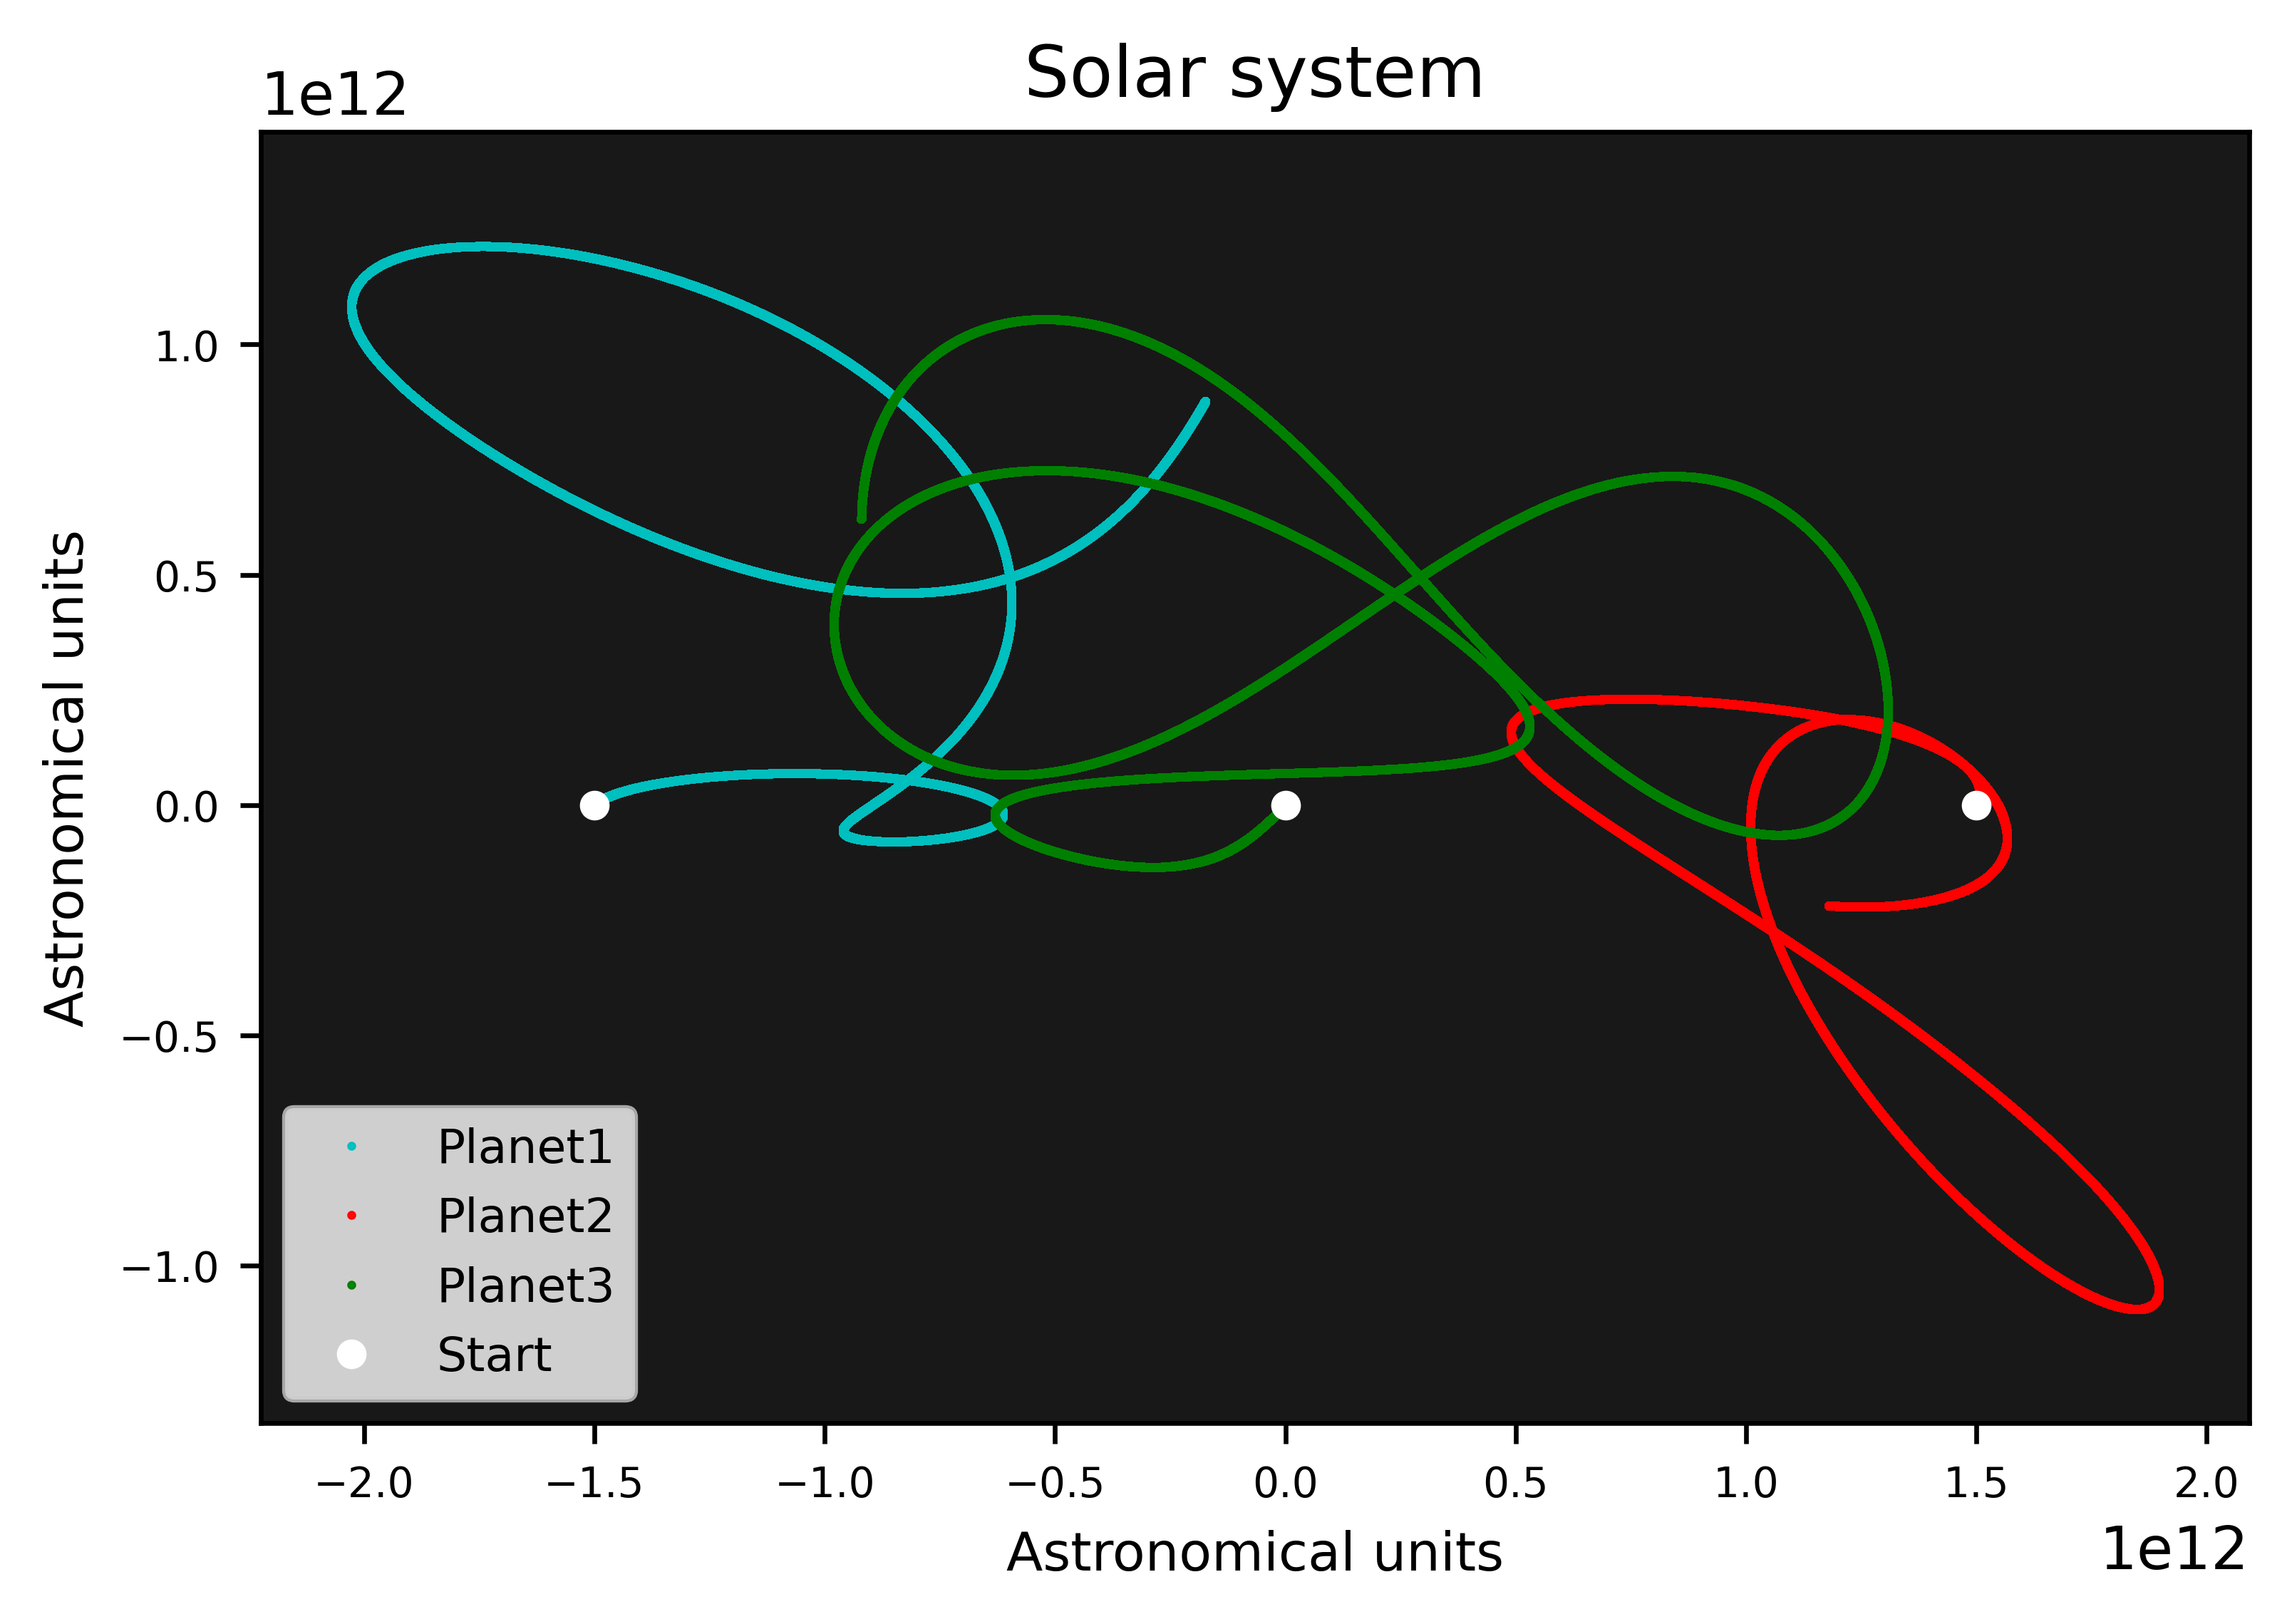

In [13]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_aspect('equal', adjustable='datalim')
ax.patch.set_facecolor((0,0,0,0.9))
colors = ['c', 'r', 'g']
for i in range(3):
    plt.plot(POS[:,i][:,0], POS[:,i][:,1],'.', markersize = 1, color = colors[i] , label = 'Planet' + str(i+1))

plt.plot(-1.5e12,0,'o', markersize=4 , color = 'white', label = 'Start')
plt.plot(1.5e12,0,'o', markersize=4 , color = 'white')
plt.plot(0,0,'o', markersize=4 , color = 'white')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Solar system', fontsize=12)
plt.xlabel('Astronomical units', fontsize=9)
plt.ylabel('Astronomical units', fontsize=9)
plt.legend(loc='lower left', prop={'size':8})
plt.show()

Here we can see the interaction of three bodies in real time over 25 years. Showing how volatile and unstable these interractions are. We can even see 2 of the bodies being ejected from the system, which implies that they got so close that their repelling force was so large that they exceeeded the escape velocity for the system.

<img src="Three_Body_Problem_1.gif" width="650" align="center">

# Simulating the solar system

In [3]:
# DATA FROM NASA JPL (cited properly in our references.), mass, initial pos, initial vel.

M2 = np.array([0.33011e24, 4.8675e24, 5.9724e24, 0.64171e24, 1898.19e24, 568.34e24, 86.813e24, 102.413e24])

POS_1 = np.array([[-2.212073002393702e10, -6.682435921338345e10, -3.461577076477692e09], 
                  [-1.085736592234813e11, -3.784241757371509e9, 6.190088659339075e9],
                  [-2.627903751048988e10, 1.445101984929515e11, 3.025245352813601e7],
                  [2.069270543147017e11, -3.560689745239088e9, -5.147936537447235e9],
                  [5.978410555886381e11, 4.387048655696349e11, -1.520164176015472e10],
                  [9.576383364792708e11, 9.821475307689621e11, -5.518981181311160e10],
                  [2.157706590772995e12, -2.055242872276605e12, -3.559274281048691e10],
                  [2.513785451779509e12, -3.739265135509532e12, 1.907027540535474e10]])

VEL_1 = np.array([[3.666229234452722e4, -1.230266984222893e4, -4.368336206255391e3],
                [8.984650886248794e2, -3.517203951420625e4, -5.320225928762774e2],
                [-2.983052803412253e4, -5.220465675237847e3,-1.014855999592612e-1],
                [1.304308833322233e3, 2.628158890420931e4, 5.188465740839767e2],
                [-7.892632213479861e3, 1.115034525890079e4, 1.305100448596264e3],
                [-7.419580382572883e3, 6.725982471305630e3, 1.775012039800541e2],
                [4.646953838324629e3, 4.614361336011624e3, -4.301369677250144e1],
                [4.475107938022004e3, 3.062850546988970e3, -1.667293921151841e2]])

In [4]:
# big 3d vv algo for solar system

def VV(M, POS_0, VEL_0, years, step):
    def a(M,R):
        """
        Computes acceleration on each body for n bodies orbiting the sun. M is array of masses of bodies
        and R is array of position vectors relative to the sun.
        """
        G = 6.67430e-11
        A = np.zeros((len(M),3))
        for i in range(len(M)):
            acceleration = - G * 1.9885e30 * R[i] / (R[i][0]**2 + R[i][1]**2 + R[i][2]**2)**1.5
            for j in range(len(M)):
                if j != i:
                    r = R[j]-R[i]
                    acceleration +=  G * M[i] * r / (r[0]**2 + r[1]**2 + r[2]**2)**1.5
            A[i] = acceleration
        return A


    n = 365*years

    POS = np.array([[[0]*3]*8]*int(n*step), dtype = float)
    POS[0] = POS_0

    VEL = np.array([[[0]*3]*8]*int(n*step), dtype = float)
    VEL[0] = VEL_0

    ACC = np.array([[[0]*3]*8]*int(n*step), dtype = float)
    ACC[0] = a(M,POS[0])

    seconds = 60*60*24*n         # seconds in run
    dt = seconds/(n*step)        # increments of one day

    for k in range(int(n*step-1)):
        POS[k+1] = POS[k] + VEL[k] * dt + 0.5 * ACC[k] * dt**2

        ACC[k+1] = a(M, POS[k])

        VEL[k+1] = VEL[k] + 0.5 * (ACC[k] + ACC[k+1]) * dt
    
    
    return POS

In [8]:
#Calculating the positions of the bodies in
POS1_one_year = VV(M2, POS_1, VEL_1, 2, 300)

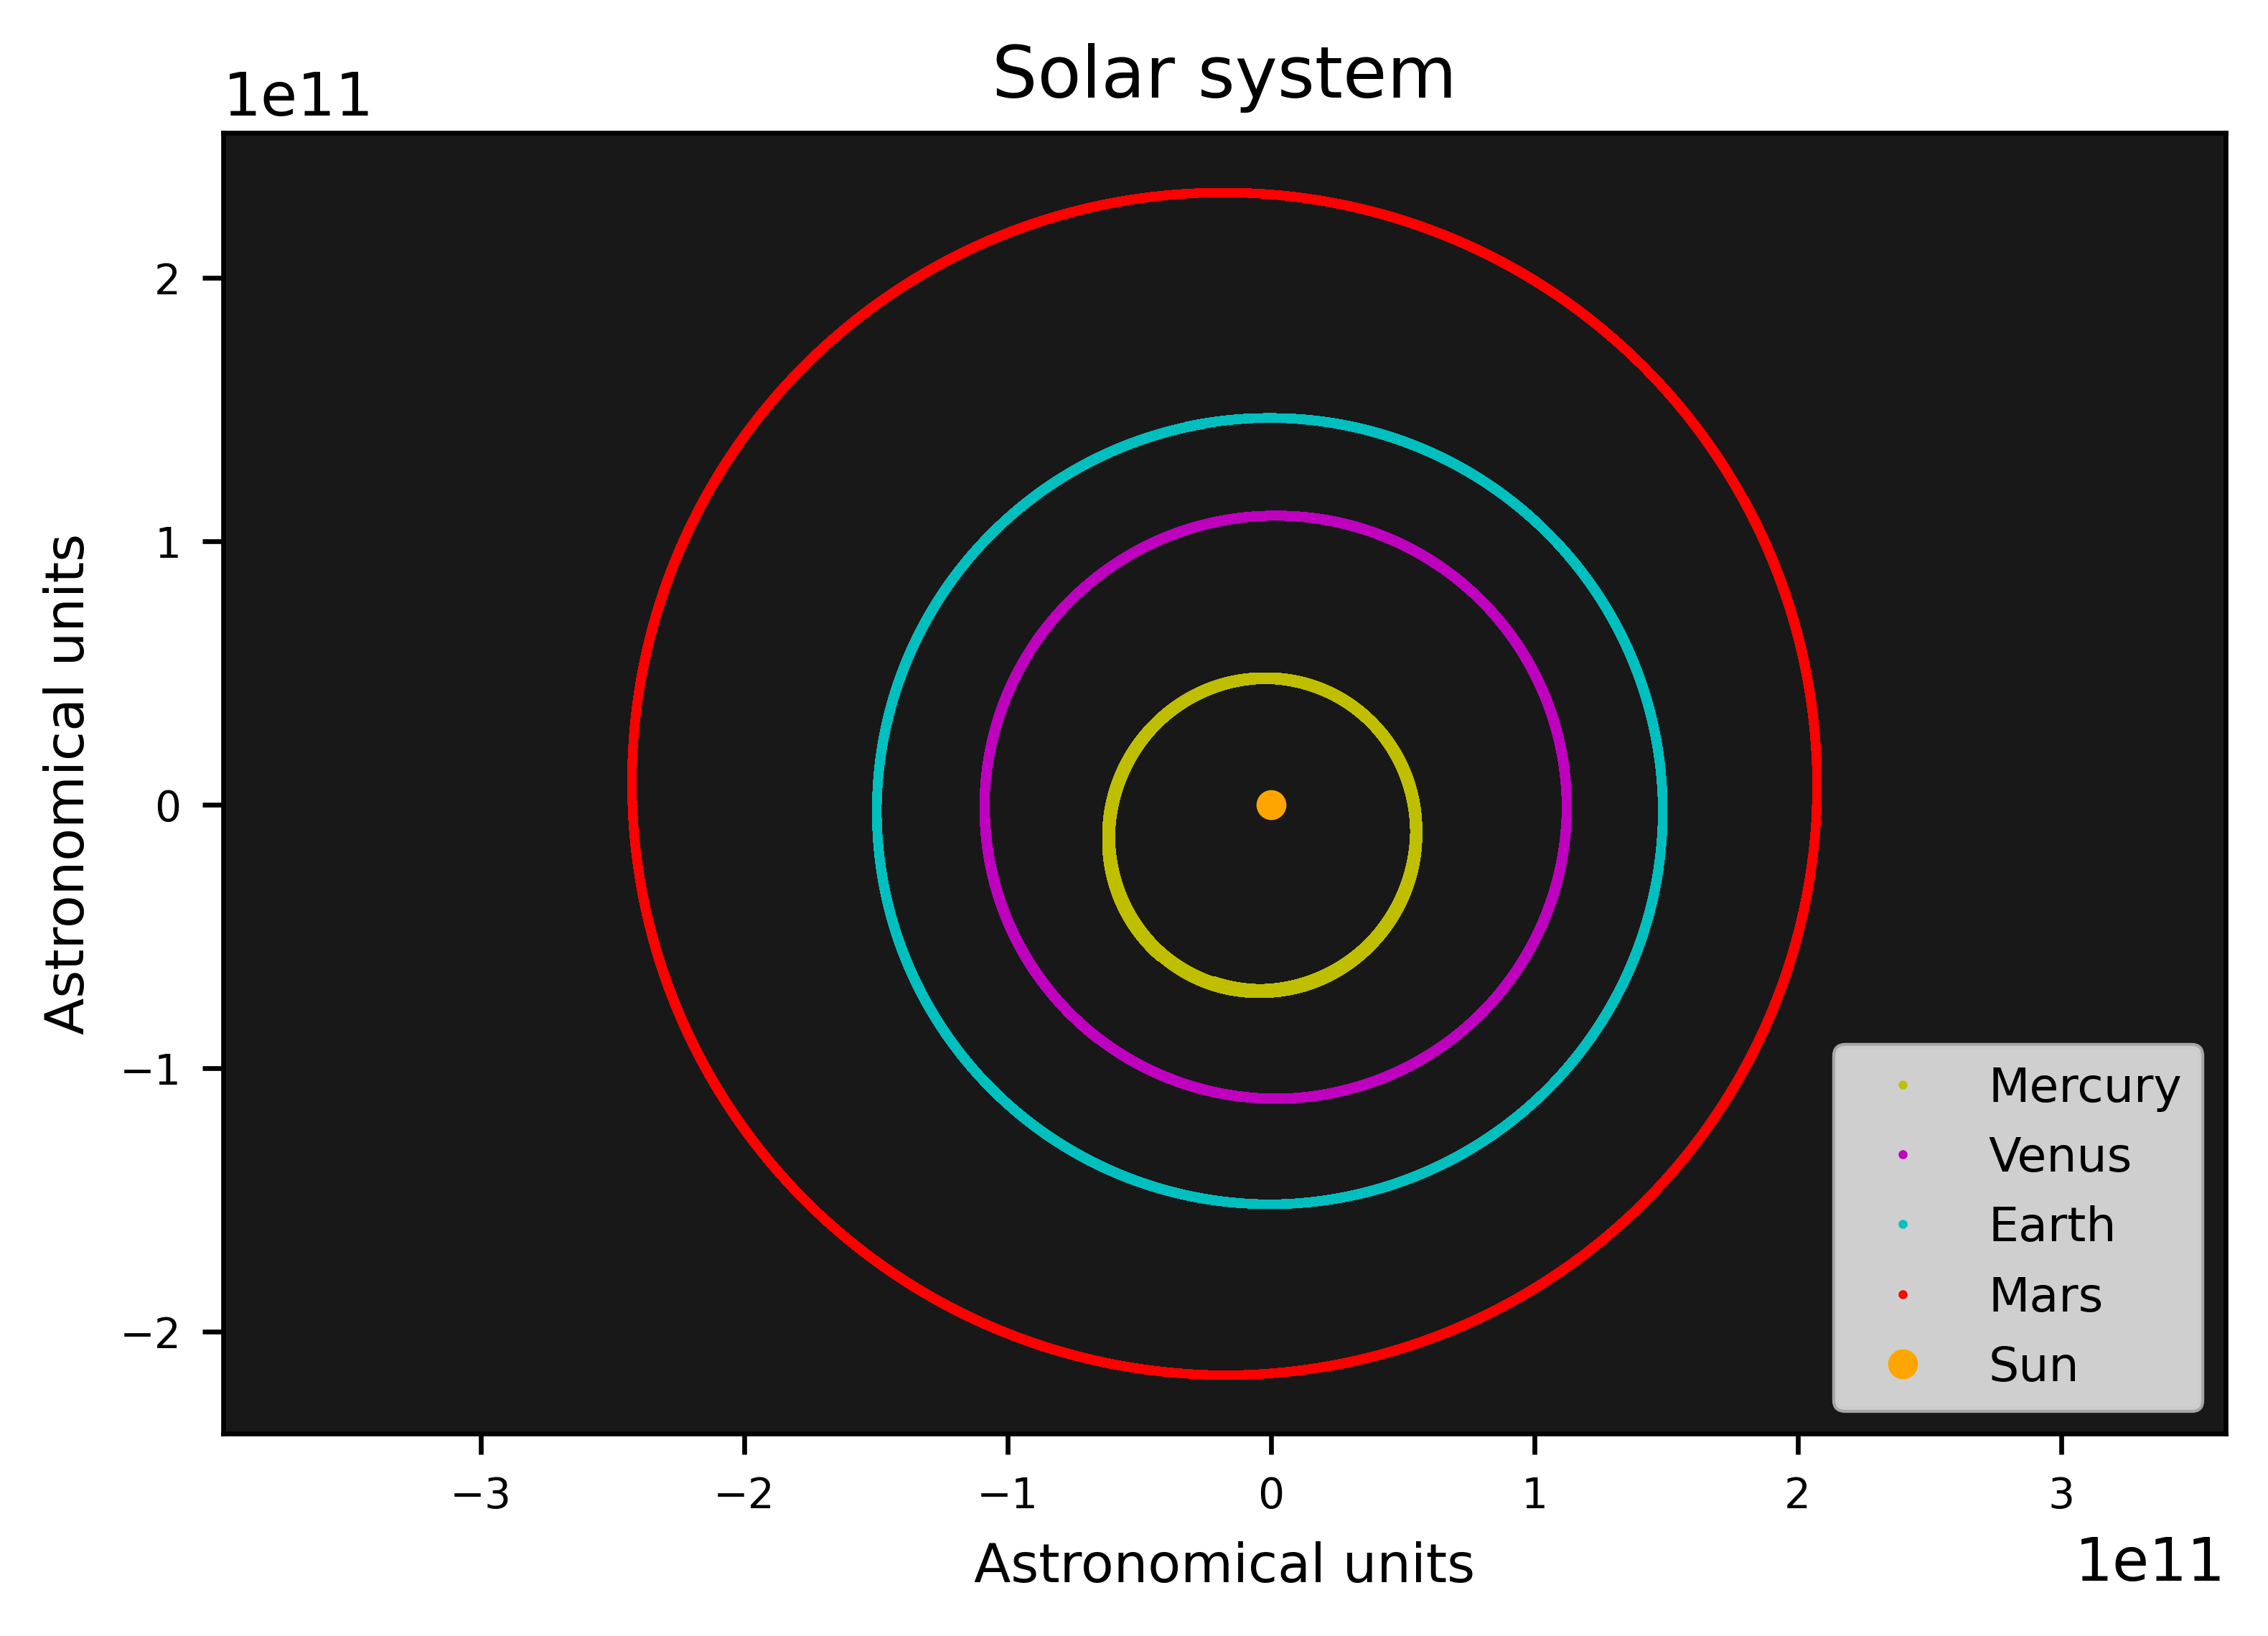

In [17]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_aspect('equal', adjustable='datalim')
ax.patch.set_facecolor((0,0,0,0.9))
planet = ['Mercury','Venus','Earth','Mars']
cols = ['y','m','c','r']
for i in range(4):
    plt.plot(POS1_one_year[:,i][:,0], POS1_one_year[:,i][:,1],'.', markersize = 1, color = cols[i], label = planet[i])

plt.plot(0,0,'o', markersize=4 , color = 'orange', label = 'Sun')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Solar system', fontsize=12)
plt.xlabel('Astronomical units', fontsize=9)
plt.ylabel('Astronomical units', fontsize=9)
plt.legend(loc='lower right', prop={'size':8})
plt.show()

<img src="solar-system.gif" width="650" align="center">

This is how the solar system evolves over time. This plot is identical to the one above that we plotted.

# References.

## Initial position data for the solar system.

https://ssd.jpl.nasa.gov/horizons.cgi#results


## Code for the solar system gif

We changed the initial conditions and the velocity verlet algorithm within this code. We did not use this code for anything other than the final gif.

https://medium.com/analytics-vidhya/simulating-the-solar-system-with-under-100-lines-of-python-code-5c53b3039fc6
